In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Embedding, LSTM, Input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (5,5), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

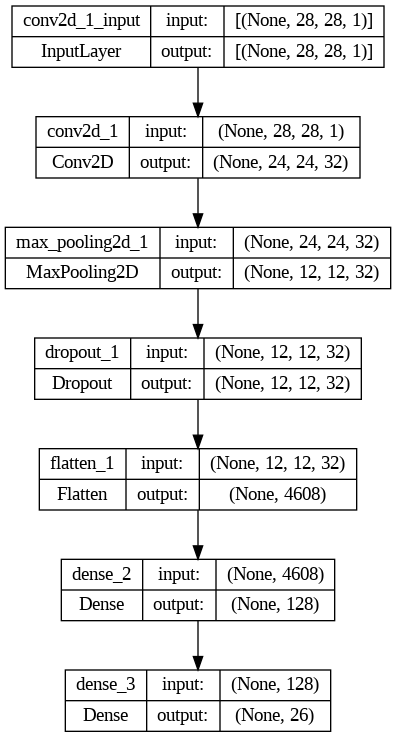

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
chunk = pd.read_csv('/content/drive/My Drive/alphabets_28x28.csv')

<ipython-input-4-85fa5534603d>:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv('/content/drive/My Drive/alphabets_28x28.csv')


In [ ]:
scaler = MinMaxScaler()
chunk = chunk.drop(index = chunk[chunk.iloc[:,0]=='This'].index) #This is for removing the corrupted rows
# print(chunk.shape)
X = chunk.iloc[:,1:].astype('float32')
y = chunk.iloc[:,0].astype('str')
# print(X.shape)
# print(y.shape)
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], 28, 28, 1)
y = pd.get_dummies(y)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train, y_train,epochs=5,batch_size=100)

Epoch 1/5
2972/2972 [==============================] - 160s 53ms/step - loss: 0.1918 - accuracy: 0.9460
Epoch 2/5
2972/2972 [==============================] - 153s 52ms/step - loss: 0.0769 - accuracy: 0.9780
Epoch 3/5
2972/2972 [==============================] - 156s 52ms/step - loss: 0.0576 - accuracy: 0.9833
Epoch 4/5
2972/2972 [==============================] - 153s 51ms/step - loss: 0.0467 - accuracy: 0.9862
Epoch 5/5
2972/2972 [==============================] - 153s 51ms/step - loss: 0.0377 - accuracy: 0.9886


In [ ]:
model.evaluate(X_test,y_test)

2322/2322 [==============================] - 15s 6ms/step - loss: 0.0431 - accuracy: 0.9882


[0.04312991723418236, 0.988152801990509]

In [ ]:
model.save('/content/drive/My Drive/cnnmodel.keras')

# Extracting text from images

In [ ]:
model = load_model('/content/drive/My Drive/cnnmodel.keras')

# Check the model summary to verify
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                        

In [ ]:
alpha = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
    9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q',
    17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y',
    25: 'Z'
}

In [ ]:
def predict(image_path):
  output = ''
  img = load_img(image_path)
  img = img_to_array(img)
  for j in range(0,img.shape[0],28):
    for i in range(0, img.shape[1], 28):
      letter = scaler.fit_transform(img[j:(j+28),i:(i+28),0])
      letter = letter.reshape(1,28,28,1)
      # plt.matshow(img[j:(j+28),i:(i+28),0])
      # plt.show()
      if(letter.sum() == 0):
        if(output[-1]==' '):
          return output[:-1]
        output += " "
      else:
        output += alpha[model.predict(letter,verbose=0).argmax()]
      #if not model.predict
  return output

In [ ]:
target_labels = pd.read_csv('/content/drive/My Drive/target_labels.csv')

directory_path = '/content/drive/My Drive/target_images'

predictions = {}
scaler = MinMaxScaler()

for image in os.listdir(directory_path):
  image_path = os.path.join(directory_path, image)
  output = predict(image_path)
  predictions[image]= output
  print(image ,": ", output)

line_6.png :  THE MEETING MINUTES YOW PREPARED WERE DETAILED AND NELL ORGANIZED ACCURATELY REFLECTING THE DISCUSJIONS AND DECISIONS MADE
line_5.png :  YOUR ANALYSIS OF THE DATA NAS ACCURATE AND WELL PRESENTED PROVIDING A CLEAR UNDERSTANDING OF THE TRENDS AND PATTERNS
line_1.png :  I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFFER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE 
line_3.png :  I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY
line_4.png :  IT SS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS ANO YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMINT AND APPRECIATED
line_2.png :  IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PROGRESS


In [ ]:
directory_path = '/content/drive/My Drive/target_images'
for image in os.listdir(directory_path):
  image_path = os.path.join(directory_path, image)
  img = load_img(image_path)
  img = img_to_array(img)
  print(img.shape)

(364, 280, 3)
(336, 280, 3)
(336, 280, 3)
(336, 280, 3)
(336, 280, 3)
(364, 280, 3)


# Sentimental Analysis

In [ ]:
sentences = []

for sentence in predictions.values():
  sentences.append(sentence)

In [ ]:
sentences

['THE MEETING MINUTES YOW PREPARED WERE DETAILED AND NELL ORGANIZED ACCURATELY REFLECTING THE DISCUSJIONS AND DECISIONS MADE',
 'YOUR ANALYSIS OF THE DATA NAS ACCURATE AND WELL PRESENTED PROVIDING A CLEAR UNDERSTANDING OF THE TRENDS AND PATTERNS',
 'I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFFER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE ',
 'I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY',
 'IT SS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS ANO YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMINT AND APPRECIATED',
 'IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PROGRESS']

In [ ]:
df = pd.read_csv('/content/drive/My Drive/sentiment_analysis_dataset.csv')

In [ ]:
X = df['line'].astype(str).tolist()
y = df['sentiment'].tolist()

## Using KNN

In [ ]:
v = CountVectorizer()

In [ ]:
X_temp = X + sentences

In [ ]:
X_vectorized = v.fit_transform(X_temp).toarray()

In [ ]:
X_vectorized.shape

(36, 318)

In [ ]:
X_train = X_vectorized[:-6]
X_test = X_vectorized[-6:]

In [ ]:
X_train.shape

(30, 318)

In [ ]:
k = 8
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y)

y_pred = knn.predict(X_test)

In [ ]:
i = 0
for index in predictions:
  print(index, ":", y_pred[i])
  i+=1

line_6.png : Neutral
line_5.png : Neutral
line_1.png : Happy
line_3.png : Happy
line_4.png : Happy
line_2.png : Angry


In [ ]:
target_labels

,file,sentiment
0,line_1.png,Angry
1,line_2.png,Angry
2,line_3.png,Happy
3,line_4.png,Happy
4,line_5.png,Neutral
5,line_6.png,Neutral


### For Reference
'line_6.png': 'THE MEETING MINUTES YOU PREPARED WEBE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE'

'line_5.png': 'YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL SRESENTED PROVIDING A CLEAR UNDERSTANDING OF THE TREWDS AND PATTERNS'

'line_1.png': 'I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE '

'line_3.png': 'I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY'

'line_4.png': 'IT JS WONDERFUL THAT YOU ALWAYS SHOW KINDNEJS AND YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMING AND APPRECIATED'

'line_2.png': 'IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PKOGRESS'

## Using LSTM

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
max_length = np.array([len(i) for i in X]).max()
max_length

149

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [ ]:
max_length = max(len(seq) for seq in sequences)

max_length

28

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
model = Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=vocab_size, output_dim=64),
    LSTM(64,return_sequences=True),
    Dropout(0.4),
    LSTM(32),
    Dense(3, activation='softmax')
])

model.compile( optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 28, 64)            17600     
                                                                 
 lstm_6 (LSTM)               (None, 28, 64)            33024     
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 63139 (246.64 KB)
Trainable params: 63139 (246.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(padded_sequences ,y,epochs = 20,batch_size=32)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 1.0973 - accuracy: 0.4333
Epoch 2/20
1/1 [==============================] - 0s 52ms/step - loss: 1.0929 - accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 0s 57ms/step - loss: 1.0882 - accuracy: 0.8667
Epoch 4/20
1/1 [==============================] - 0s 49ms/step - loss: 1.0829 - accuracy: 0.8667
Epoch 5/20
1/1 [==============================] - 0s 53ms/step - loss: 1.0775 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 48ms/step - loss: 1.0690 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 57ms/step - loss: 1.0587 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 63ms/step - loss: 1.0458 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 54ms/step - loss: 1.0299 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 45ms/step - loss: 1.0108 - accuracy: 1.0000
Epoch 11/20
1/1 [==============

In [ ]:
pred_sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
pred_padded = pad_sequences(pred_sequences, maxlen=max_length)

In [ ]:
y_predicted = model.predict(pred_padded)

1/1 [==============================] - 1s 824ms/step


In [ ]:
map = {0: 'Angry', 1: 'Happy', 2: 'Neutral'}

In [ ]:
outputs = [map[i] for i in y_predicted.argmax(1)]

In [ ]:
i = 0
for index in predictions:
  print(index, ":", outputs[i])
  i+=1

line_6.png : Neutral
line_5.png : Neutral
line_1.png : Neutral
line_3.png : Neutral
line_4.png : Neutral
line_2.png : Neutral


In [ ]:
target_labels

,file,sentiment
0,line_1.png,Angry
1,line_2.png,Angry
2,line_3.png,Happy
3,line_4.png,Happy
4,line_5.png,Neutral
5,line_6.png,Neutral


### For Reference
'line_6.png': 'THE MEETING MINUTES YOU PREPARED WEBE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE'

'line_5.png': 'YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL SRESENTED PROVIDING A CLEAR UNDERSTANDING OF THE TREWDS AND PATTERNS'

'line_1.png': 'I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NEVER OFEER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE '

'line_3.png': 'I AM DELIGHTED BY YOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY'

'line_4.png': 'IT JS WONDERFUL THAT YOU ALWAYS SHOW KINDNEJS AND YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMING AND APPRECIATED'

'line_2.png': 'IT IS FRUSTRATING THAT YOU NEVER PAY ATTENTION DURING DISCUSSIONS AND YOUR LACK OF FOCUS IS REALLY AFFECTING OUR PKOGRESS'